# 1. Earnings Surprises and Stock Prices

## Loading data

In this exercise you will analyze the response of stock prices to earning surprises.

First we load data on earnings and prices of stocks.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

data = pd.read_excel('https://drive.google.com/uc?export=download&id=1jy0YxttGIgh7WXIETQWdOcWqoLlNpWSm')

## Variable List

- medact: median actual earnings

- adj: adjustment factor

- medest60: median earnings forecasts in the last 60 days

- rawwin1: raw returns (0, +1)

- rawwin375: raw returns (3, 75)

- netwin1: net returns (0, +1)

- netwin375: net returns (3, 75)

- carwin1: adjusted returns (0, +1)

- carwin375: adjusted returns (3, 75)

- stdest60: stand deviation of earning forecast

- comnam: company name

- lagprice:  Lagged price of a share

- lagshr: lagged number of shares outstanding


**1. Construct the earnings surprises.Calculate the mean and stand errors.**



In [0]:
#data.info()
#data.isnull().sum()

In [0]:
data.interpolate(method='linear',inplace=True)

In [0]:
#data.isnull().sum()

In [0]:
data['surprise_earnings'] = (((data['adj'] * data['medact']) -(data['adj'] * data['medest60']))/(data['lagprice'])) 
print(data['surprise_earnings'].mean()) 
print(data['surprise_earnings'].std())

-0.03358526282056828
6.8754010925866575


**What is the mean and stand errors?**

Answer: The mean is -0.0336 and the standard error is 6.8754

**2. Estimate an OLS model to relate raw returns r (variable “RAWWIN1”) to s as
a measure of surprise**
$$r^{(0,1)}_{tk}=\alpha_{0}+\phi_{}s_{tk}+\epsilon_{tk}$$




**How do you interprete $\phi_{}$?**

Answer: $\phi_{}$ is the regression coefficient. It measures the nominal change in the independent variable 'Y' (here, raw returns) when correlated with a unit change in the dependent variable 'X'(here, earnings surprise)

This means, that the change in raw returns $r_{(0,1)}$; given unit change in surprise earnings equals 9.62e-06

We also look at the p-value while interpreting regression results. A low p-value (< 0.05) indicates that we can reject the NULL hypothesis ($H_{0}$). However, the p-value obtained from this model is very high (0.842). An insignificant p-value suggests that the changes in the earnings surprise are not associated with the changes in the response of raw returns.

In [0]:
formula = 'rawwin1 ~ surprise_earnings'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                rawwin1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03985
Date:                Thu, 27 Feb 2020   Prob (F-statistic):              0.842
Time:                        01:01:00   Log-Likelihood:                 70235.
No. Observations:               68384   AIC:                        -1.405e+05
Df Residuals:                   68382   BIC:                        -1.404e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0020      0.00

**Does the coefficient $\phi$ change if restricting the sample
to $s_{tk}$ in the range [−0.01, 0.01] and then in the range [−0.001, 0.001]?**

Answer: Yes, the coefficient and Rsquare values both change upon restricting the data to a narrower band

$\phi_{(sample)}$ = 9.62e-06 
--
$r^2_{(sample)}$ = 0.000 

---
$\phi_{(−0.01, 0.01)}$ = 5.0090 
--
$r^2_{(−0.01, 0.01)}$ = 0.031 

---

$\phi_{(−0.001, 0.001)}$ = 20.6358 
--
$r^2_{(−0.001, 0.001)}$ = 0.015

---
Comparatively, we get higher values for '$\phi$' by restricting the original sample range to (+- 0.01) & (+- 0.001). As shown above, the coefficient '$\phi$' changes from 9.62e-06 to 5.009, and further to 20.636. This implies that the data has outliers which affect its central tendency and influences the coefficient '$\phi$'. 

Further, both the new models ranged from (+- 0.01) & (+- 0.001) have statistically significant p-values. In other words, earnings surprise's values for these models are related to the changes in their raw returns.


Among the three models, $r^2_{(−0.01, 0.01)}$ is the best at 0.031

In [0]:
#getting a certain column within a range of values  >= -.01 && <= .01
data_range1 = data[data['surprise_earnings'] >= -.01]
data_range1 = data_range1[data_range1['surprise_earnings'] <= .01] 
#data_range1['surprise_earnings'].describe()

In [0]:
formula = 'rawwin1 ~ surprise_earnings'
results = smf.ols(formula, data_range1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                rawwin1   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1950.
Date:                Thu, 27 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:01:14   Log-Likelihood:                 68424.
No. Observations:               60376   AIC:                        -1.368e+05
Df Residuals:                   60374   BIC:                        -1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004      0.00

In [0]:
#getting a certain column within a range of values  >= -.001 && <= .001
data_range2 = data[data['surprise_earnings'] >= -.001]
data_range2 = data_range2[data_range2['surprise_earnings'] <= .001] 
#data_range2['surprise_earnings'].describe()

In [0]:
formula = 'rawwin1 ~ surprise_earnings'
results = smf.ols(formula, data_range2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                rawwin1   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     458.0
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          7.05e-101
Time:                        01:01:54   Log-Likelihood:                 36996.
No. Observations:               30944   AIC:                        -7.399e+04
Df Residuals:                   30942   BIC:                        -7.397e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0042      0.00

**For questions 3-7 you only need to consider cases when $s_{tk}$ is in the range [−0.01, 0.01]**



**3. do a kernel regression of stock returns $r^{(0,1)}_{tk}$ on the earnings
surprise $s_{tk}$.**

In [0]:
from sklearn.model_selection import train_test_split
#range of values  >= -.01 && <= .01
data_x = data_range1['surprise_earnings']
data_y = data_range1['rawwin1']
kernel = sm.nonparametric.KernelReg(data_y, data_x, var_type='c')
print(kernel)

In [0]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


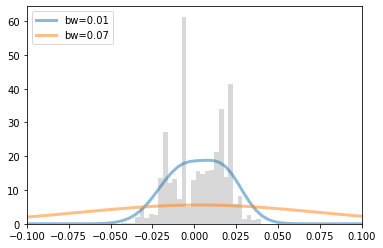

In [0]:
x_grid = np.linspace(-0.1, 3.5, 1000)
pred_kernel = kernel.fit(data_x)[0]
x=pred_kernel
fig, ax = plt.subplots()
for bandwidth in [0.01, 0.07]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.set_xlim(-0.1, 0.1)
ax.legend(loc='upper left')

**Is the
relationship between the stock returns and the earnings surprise linear? Provide at least one
interpretation for the observed non-linearity.**

Answer: The relationship is non-linear. 

The earning surprise is the difference between the earning announcement and the forecast, divided by the lagged price of a share. While the raw returns measure the percentage change in stock returns a day after the announcements have been made.

*Interpretation:*
Bad news i.e. negatively incorrect forecasts, pushes people to abandon ship quicker than good news supports buying decisions. Also, the market may not always necessarily agree with the analysts view since it involves multiple players. Thus, behavioral/sentiment analysis is crucial for any activity involving purchase decisions.

Furthermore, the model assumes that there is information symmetry in the market. Which is not always the case. Additionally, a period of one day may not be enough to measure the earning surprise since traders might be reacting differently to leading/lagging indicators instead of responding as per analyst reports

**4. Split the sample into a training set and a test set.Estimate
a polynomial function with degree>3 using the training set and predict the return $r^{(0,1)}$ for
the test set**

In [0]:
train=data_range1.loc[(data_range1['comnam'].str.startswith(('A','B','C','D','E','F')))]
test=data_range1.loc[(data_range1['comnam'].str.startswith(('G','H','I','J','K','L')))]

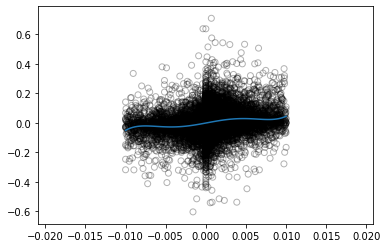

0.07679764490416882


In [0]:
from math import sqrt
from sklearn.metrics import mean_squared_error
train_x = train['surprise_earnings']
train_y = train['rawwin1']
test_x = test['surprise_earnings']
test_y = test['rawwin1']

weights = np.polyfit(train_x, train_y, 5)
model = np.poly1d(weights)

# Prediction on validation set
pred1 = model(test_x)
# We will plot the graph for 70 observations only
xp = np.linspace(test_x.min(),test_x.max(),70)
pred_plot = model(xp)
plt.scatter(test_x, test_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

rms = sqrt(mean_squared_error(test_y, pred1))
print(rms)

**What is the RMSE?**

Answer: 0.07679764490416882

**5. Estimate a regression spline or MARS model for the training set and use the model to predict the return $r^{(0,1)}$ for the test set.**



In [0]:
!pip install sklearn-contrib-py-earth
from pyearth import Earth

In [0]:
model = Earth()
model.fit(train_x, train_y)
pred5 =model.predict(test_x)
print(pred5)
# Calculating RMSE values
rms5 = sqrt(mean_squared_error(test_y, pred5))
print(rms5)

/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


[ 0.00689052 -0.01486417 -0.00466917 ...  0.02574246  0.02268024
 -0.02118626]
0.07668152124607185


/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


**What is the RMSE?**

Answer: 0.07668152124607185

**6. Estimate kernel regression for the training set, and use the model to predict the
return $r^{(0,1)}$ for the test set.**



In [0]:
#from sklearn.model_selection import train_test_split
kernTrain = sm.nonparametric.KernelReg(train_y, train_x, var_type='c')
kernPred = kernTrain.fit(test_x)[0]
rmsKernPred = sqrt(mean_squared_error(test_y, kernPred))
print(rmsKernPred)

0.07667928755278064


In [0]:
print (kernTrain)
#BW Selection method = cross validation least square
print(kernPred)

KernelReg instance
Number of variables: k_vars = 1
Number of samples:   N = 41582
Variable types:      c
BW selection method: cv_ls
Estimator type: ll

[ 0.00861205 -0.01281639 -0.0054125  ...  0.02922167  0.02336364
 -0.01817839]


**What is the RMSE?**

Answer: 0.07667928755278064

**7. Which model from part 4 to part 6 has the best prediction in the test sample? Use
that model and the whole sample to predict raw returns $r^{(3,75)}$ (variable “RAWWIN375”) as
a function of earnings surprise and plot the relationship.**



Kern: 0.07667928755278064

Spline: 0.07668152124607185

Polynomial: 0.07679764490416882

Thus, the kernel model has the best prediction since RMSE is the lowest.


/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:1975: RuntimeWarning: overflow encountered in true_divide
  s = divide(1, s, where=large, out=s)
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:1978: RuntimeWarning: invalid value encountered in matmul
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))
/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:1978: RuntimeWarning: invalid value encountered in multiply
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))


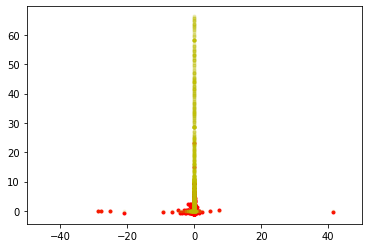

In [0]:
kernPred_12 = kernTrain.fit(data['surprise_earnings'])[0]

plt.xlim(-50,50)
plt.plot(data['surprise_earnings'],data['rawwin375'],'r.')
plt.plot(data['surprise_earnings'],kernPred_12,'y.',alpha=0.1)

**What does the theory of efficient
financial markets predict the relationship to be? What do you find?**

Answer: The predicted model & its plot seem to agree; it has no clear visual relationship.The theory of efficient markets suggests that all the information available will be absorbed in the market and that the market reacts accordingly.
As per the theory, the data provided by the analysts should reflect the raw returns. Also, the deviation between actual and expected should create a common effect of buying/selling. 

However,  The model appears poor. Since the model was supposed to predict rawwin1 and not rawwin375 maybe that's why it can't predict rawwin375 very well. 

**8. Plot the kernel density of this variable for
values between -0.1 and 0.1 using bandwidth of 0.0025.**



(-0.1, 0.1)

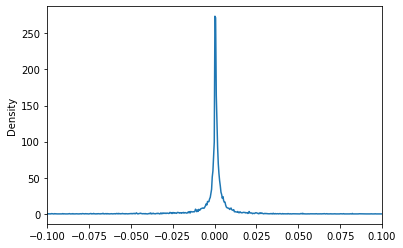

In [0]:
data_range3 = data[data['surprise_earnings'] >= -.1]
data_range3 = data_range3[data_range3['surprise_earnings'] <= .1] 
from sklearn.neighbors import KernelDensity
KDE = KernelDensity(bandwidth=.0025, kernel = 'gaussian')
data_range3['surprise_earnings'].plot.kde(bw_method = .0025)
plt.xlim(xmin=-.1)
plt.xlim(xmax=.1)

**Is there a discontinous jump in the
density at zero? Interpret your result relating to manipulation of earnings.**

Answer: No, there isn't a discontinuous jump in the density of the surprise earnings. Instead, it is continuous. 

The earning surprise is the difference between the earning announcement and the forecast, divided by the lagged price of a share. Thus a near zero mean suggests that the actual earnings and forecasted are pretty close.

Manipulation in earnings occurs when companies rigs their numbers to make their earnings look inflated to attract shareholders. However, this gets cross checked by several analyst using cashflow analysis (DCF) and market multiple approach. Thus, the probability of manipulation in the data is scarce.

# 2. Survival of Cryptocurrencies

In this exercise, we will analyze the survival rate of over 2,000 cryptocurrencies
that are or were previously traded on cryptocurrency exchanges

## Loading data



In [0]:
data2 = pd.read_excel('https://drive.google.com/uc?export=download&id=1kqUYjmTNPEvJeURLXhmPTDyWd7OclFnT')
data2.interpolate(method="linear",inplace=True)
data2.info()

## Variable List

- symbol: Symbol

- name: Name

- price0:  price of the first week it started trading

- volume0: average daily trading volume of the first week

- firstweek: first week it started trading on exchange

- lastweek: last week it is traded on the exchanges




**1. Prepare the data for survival analysis by creating a dummy variable for exit (which
equals one if the cryptocurrency has been delisted from the exchange by the last week of the
sample) and a time variable**

In [0]:
data2['diff']=data2['lastweek']-data2['firstweek']
idx = data2.loc[data2['lastweek']==354].index
data2['exit']=1
data2.loc[idx, 'exit'] = 0
data2.tail()

**2. Plot the survival curve for cryptocurrencies using the Kaplan-Meier method**

In [0]:
!pip install lifelines
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation
from lifelines import KaplanMeierFitter

In [0]:
kmf = KaplanMeierFitter() 

kmf.fit(durations = data2['diff'], event_observed = data2['exit'])

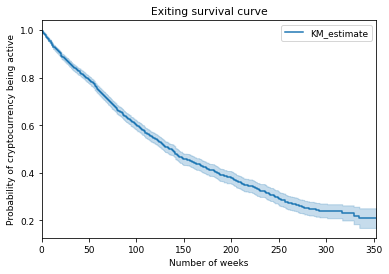

52    0.781689
Name: KM_estimate, dtype: float64

In [85]:
plt.figure()
kmf.plot()
plt.title("Exiting survival curve")
plt.ylabel("Probability of cryptocurrency being active")
plt.xlabel('Number of weeks')
plt.show()
kmf.survival_function_at_times(52)

**On
average what fraction of cryptocurrencies survive over a year (52 weeks)?**

Answer: 0.781689

**3. Compare the survival curves for cryptocurrencies that are originated on or before
January 1, 2017 (week 192) vs cryptocurrencies that are originated after the date.**

Text(0.5, 0, 'Number of weeks')

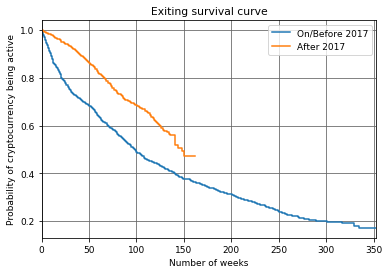

In [86]:
T = data2['diff']
E = data2['exit']

plt.figure()
ax = plt.subplot(111)

a = (data2['firstweek'] <= 192)
kmf.fit(T[a], event_observed=E[a], label="On/Before 2017")
kmf.plot(ax=ax, ci_force_lines=False, ci_show=False)

b = (data2['firstweek'] >= 192)
kmf.fit(T[b], event_observed=E[b], label="After 2017")
kmf.plot(ax=ax, ci_force_lines=False, ci_show=False)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("Exiting survival curve")
plt.ylabel("Probability of cryptocurrency being active")
plt.xlabel('Number of weeks')

**Is it riskier
to buy new cryptocurrencies before or after 2017?**

Answer: On/Before 2017 is riskier than after. This is due to the fact that the probability of cryptocurrency being active is lesser as shown in the graph

**4. Compare the survival curves for cryptocurrencies with a starting price of below 5
cents ($0.05) and above 5 cents**

Text(0.5, 0, 'Number of weeks')

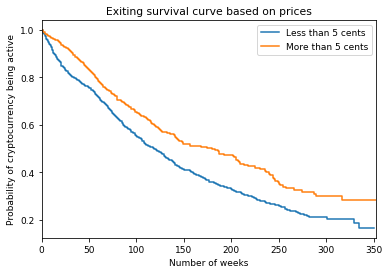

In [87]:
T = data2['diff']
E = data2['exit']

plt.figure()
ax = plt.subplot(111)

a = (data2['price0'] <= 0.05)
kmf.fit(T[a], event_observed=E[a], label="Less than 5 cents")
kmf.plot(ax=ax, ci_force_lines=False, ci_show=False)

b = (data2['price0'] > 0.05)
kmf.fit(T[b], event_observed=E[b], label="More than 5 cents")
kmf.plot(ax=ax, ci_force_lines=False, ci_show=False)

plt.title("Exiting survival curve based on prices")
plt.ylabel("Probability of cryptocurrency being active")
plt.xlabel('Number of weeks')

**Is it riskier to buy new cryptocurrencies with a starting price
of below 5 cents or above 5 cents?**

Answer: Lesser than 5 cents is riskier as its probability of staying active is smaller. 

**5. Merge the data with “bitcoin_price.xlsx” to get the price and supply of Bitcoins
in the first week each cryptocurrency was initiated. (you should merge “FIRSTWEEK” from
ctypto.xlsx to “WEEK” from bitcoin_price.xlsx)**

In [0]:
bitcoin_p = pd.read_excel('https://drive.google.com/uc?export=download&id=17chEaveWV3Li947WeRJPfhiBInADr_9x')
new_df = pd.merge(data2, bitcoin_p,  how='left', left_on='firstweek',right_on='week')
new_df['after2017']=0
new_df.head()

,symbol_x,name_x,price0,volume0,firstweek,lastweek,diff,exit,name_y,symbol_y,cap,price,supply,week,after2017
0,$$$,Money,3.500000e-05,132.0,134,293,159,1,Bitcoin,BTC,4752000000,320.17,14843750,134,0
1,$MINE,InstaMineNuggets,2.893000e-03,290.0,99,131,32,1,Bitcoin,BTC,3994000000,286.39,13944575,99,0
2,$MINEW,InstaMineNuggets A,7.130000e-04,328.0,99,129,30,1,Bitcoin,BTC,3994000000,286.39,13944575,99,0
3,$MINEZ,InstaMineNuggets B,1.572000e-03,709.0,99,129,30,1,Bitcoin,BTC,3994000000,286.39,13944575,99,0
4,$PAC,PACcoin,1.080000e-08,4.0,133,325,192,1,Bitcoin,BTC,5532000000,373.37,14816675,133,0


**6. Estimate a Cox proportional hazard model using the following variables to predict survival of
cryptocurrencies:**

- Log starting price (log(PRICE0))

- Log average volume in first week (log(VOLIME0))

- Log price of bitcoin in the first week

- A dummy variable for whether it is initiated after January 1 2017





In [0]:
idx = new_df.loc[new_df['firstweek']>192].index
new_df.loc[idx, 'after2017'] = 1
new_df['log_price']=np.log(new_df['price0'])
new_df['log_vol']=np.log(new_df['volume0'])
new_df['log_bitprice']=np.log(new_df['price'])
new_df.tail()

In [0]:
df_new1=new_df[['after2017','log_price','log_vol','log_bitprice','exit','diff']]
cph1 = CoxPHFitter()
cph1.fit(df_new1, 'diff', event_col='exit')
cph1.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
after2017,-0.076065,0.926756,0.128339,-0.327605,0.175476,0.720647,1.191813,-0.592686,5.533916e-01,0.853627
log_price,0.018339,1.018508,0.007908,0.002839,0.033838,1.002843,1.034417,2.318982,2.039600e-02,5.615570
log_vol,-0.088438,0.915360,0.007662,-0.103456,-0.073420,0.901715,0.929210,-11.541909,8.110521e-31,99.959976
log_bitprice,-0.086836,0.916828,0.046418,-0.177813,0.004142,0.837099,1.004150,-1.870737,6.138149e-02,4.026053


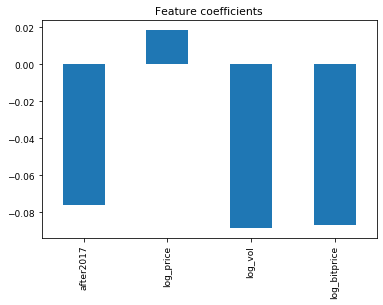

In [88]:
plt.rcParams.update({'font.size': 9})
plt.figure()
plt.title('Feature coefficients')
cph1.summary['coef'].plot(kind='bar')

**(a)What is the coefficient of the log starting price? What does the coefficient
mean?**

Answer: 0.018339.

This Cox proportional hazard model is a method of investigating the effect of several variables such as log (bitcoin price), log (volume traded), dummy variable for being active after 2017 on the log price change of the crytocurrency.

The coeffficient obtained relates to measuring the hazard. A positive value indicates a worse prognosis. This means that as the log price increases, the probability of survival (Crytocurrency being active) decreases

**(b)Plot the baseline survival rate.**

0.799710331456815

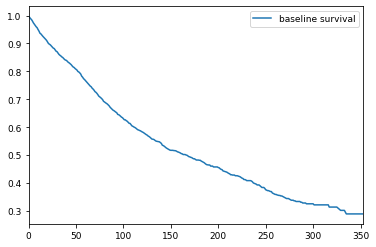

In [0]:
cph1.baseline_survival_.plot()
cph1.baseline_survival_.loc[52,'baseline survival']

**On average what fraction of cryptocurrencies
survive a year?**

Answer: 0.799710331456815

**(c)Plot the predicted survival curve for the cryptocurrency “Nexo”.**

Text(0.5, 1.0, 'Nexo')

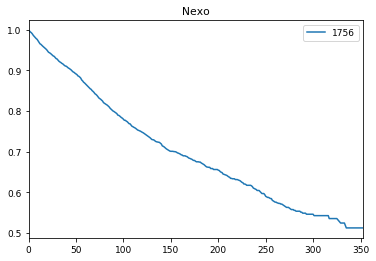

In [0]:
cph1.predict_survival_function(new_df[new_df['name_x']=='Nexo']).plot()
plt.title("Nexo")

**(d)Plot the predicted survival curve for a new cryptocurrency initiated in the
week of February 2, 2020 with starting price=0.03 and first week’s volume=1 million.**

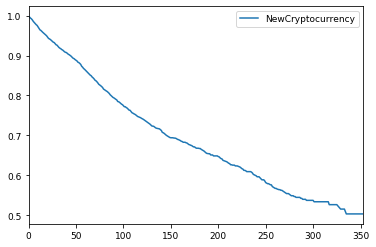

In [0]:
#'after2017','log_price','log_vol','log_bitprice','exit','diff
NewCryptocurrency=pd.DataFrame(np.array([1,np.log(.03),np.log(1000000),9.142529, 0, 0]).reshape(1,-1),index=['NewCryptocurrency'],columns=df_new1.columns)
cph1.predict_survival_function(NewCryptocurrency).plot()

**7. Use week numbers not divisible by 3 (week 1, 2, 4, 5, 7...) as training set and week
numbers dividible by 3 (week 3, 6, 9...) as test set. Estimate the Cox proportional hazard
model on the training set and predict the survival of cryptocurrencies in the test set.**

In [0]:
train = df_new1.loc[new_df['week']%3!=0]
test = df_new1.loc[new_df['week']%3==0]
cph_2 = CoxPHFitter()
cph_2.fit(train, 'diff', event_col='exit')
cph_2.predict_partial_hazard(test)

In [0]:
cph_2.predict_survival_function(test)

In [0]:
cph_2.predict_partial_hazard(test).plot()

In [0]:
#calculate concordance score
from lifelines.utils import concordance_index
print(concordance_index( test['diff'], -cph_2.predict_partial_hazard(test), test['exit'] ) )

0.6732298388916468


**What
is the concordance index?**

Answer: 0.6732298388916468

In [0]:
# use cross validation for model selection
print(np.mean(k_fold_cross_validation(cph_2, test, 'diff', event_col='exit', k=5, scoring_method="concordance_index")))

0.6699463659284132


**Add another variable that might predict the survival (for example,
you can use characteristics about the name of cryptocurrency; be creative!)**

In [0]:
####
df_new2=new_df[['after2017','log_price','log_vol','log_bitprice','exit','diff','cap','supply']]
train1 = df_new2.loc[new_df['week']%3!=0]
test1 = df_new2.loc[new_df['week']%3==0]
cph_3 = CoxPHFitter()
cph_3.fit(train1, 'diff', event_col='exit')
cph_3.predict_partial_hazard(test1)

In [0]:
#calculate concordance score
from lifelines.utils import concordance_index
print(concordance_index( test1['diff'], -cph_3.predict_partial_hazard(test1), test1['exit'] ) )

0.6755494381515411


**Does it improve
the prediction?**

Answer: Concordance index is used for validating the predictive ability of a survival model. As we add variables (Cap, supply) the value of concordance index increases. Since higher is better,

Index without  & supply: 0.6732298388916468

Index with cap & supply: 0.6755494381515411

Thus, by adding cap& supply to the model, it's prediction power increases 


In [0]:
# use cross validation for model selection
print(np.mean(k_fold_cross_validation(cph_3, test1, 'diff', event_col='exit', k=5, scoring_method="concordance_index")))

0.6740716907562689
